In [7]:
# importing necessary liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for PCA and model building

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# visualization custamization

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid')
%matplotlib inline

# warnings liberary to ignore future warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/PCA%20(dimensionality%20reduction)/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# drop Id column, because it is not useful
df.drop(columns='Id', inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# checking null values
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# checking duplicates
df.duplicated().sum()

3

In [11]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# checking datatypes
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Visualization

In [15]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


Text(0, 0.5, 'PetalWidth')

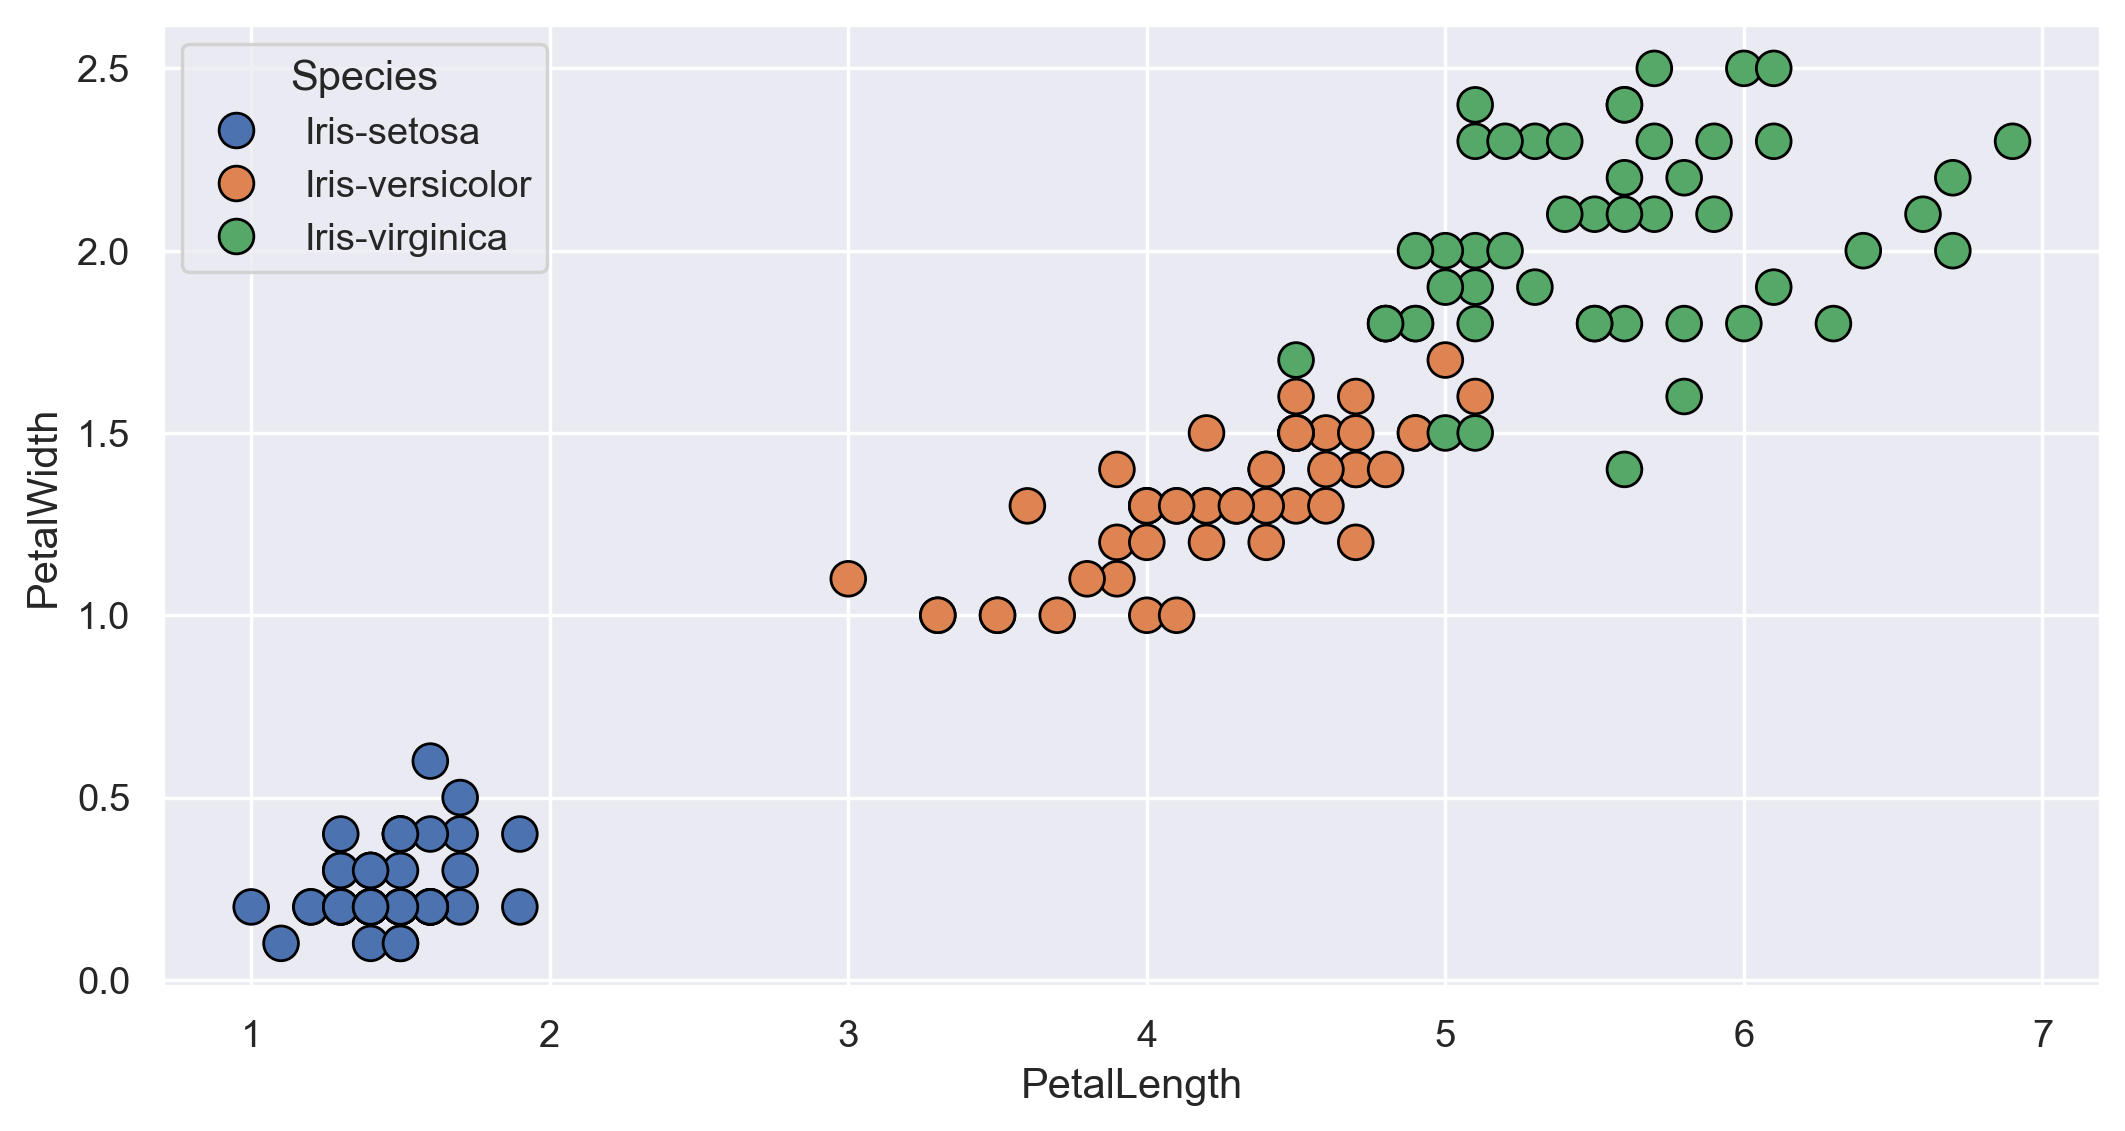

In [17]:
# scatterplot
sns.scatterplot(data=df, x='PetalLengthCm',
                y='PetalWidthCm',
                hue='Species',
                s=100,
               edgecolor='black')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

Text(0, 0.5, 'PetalWidth')

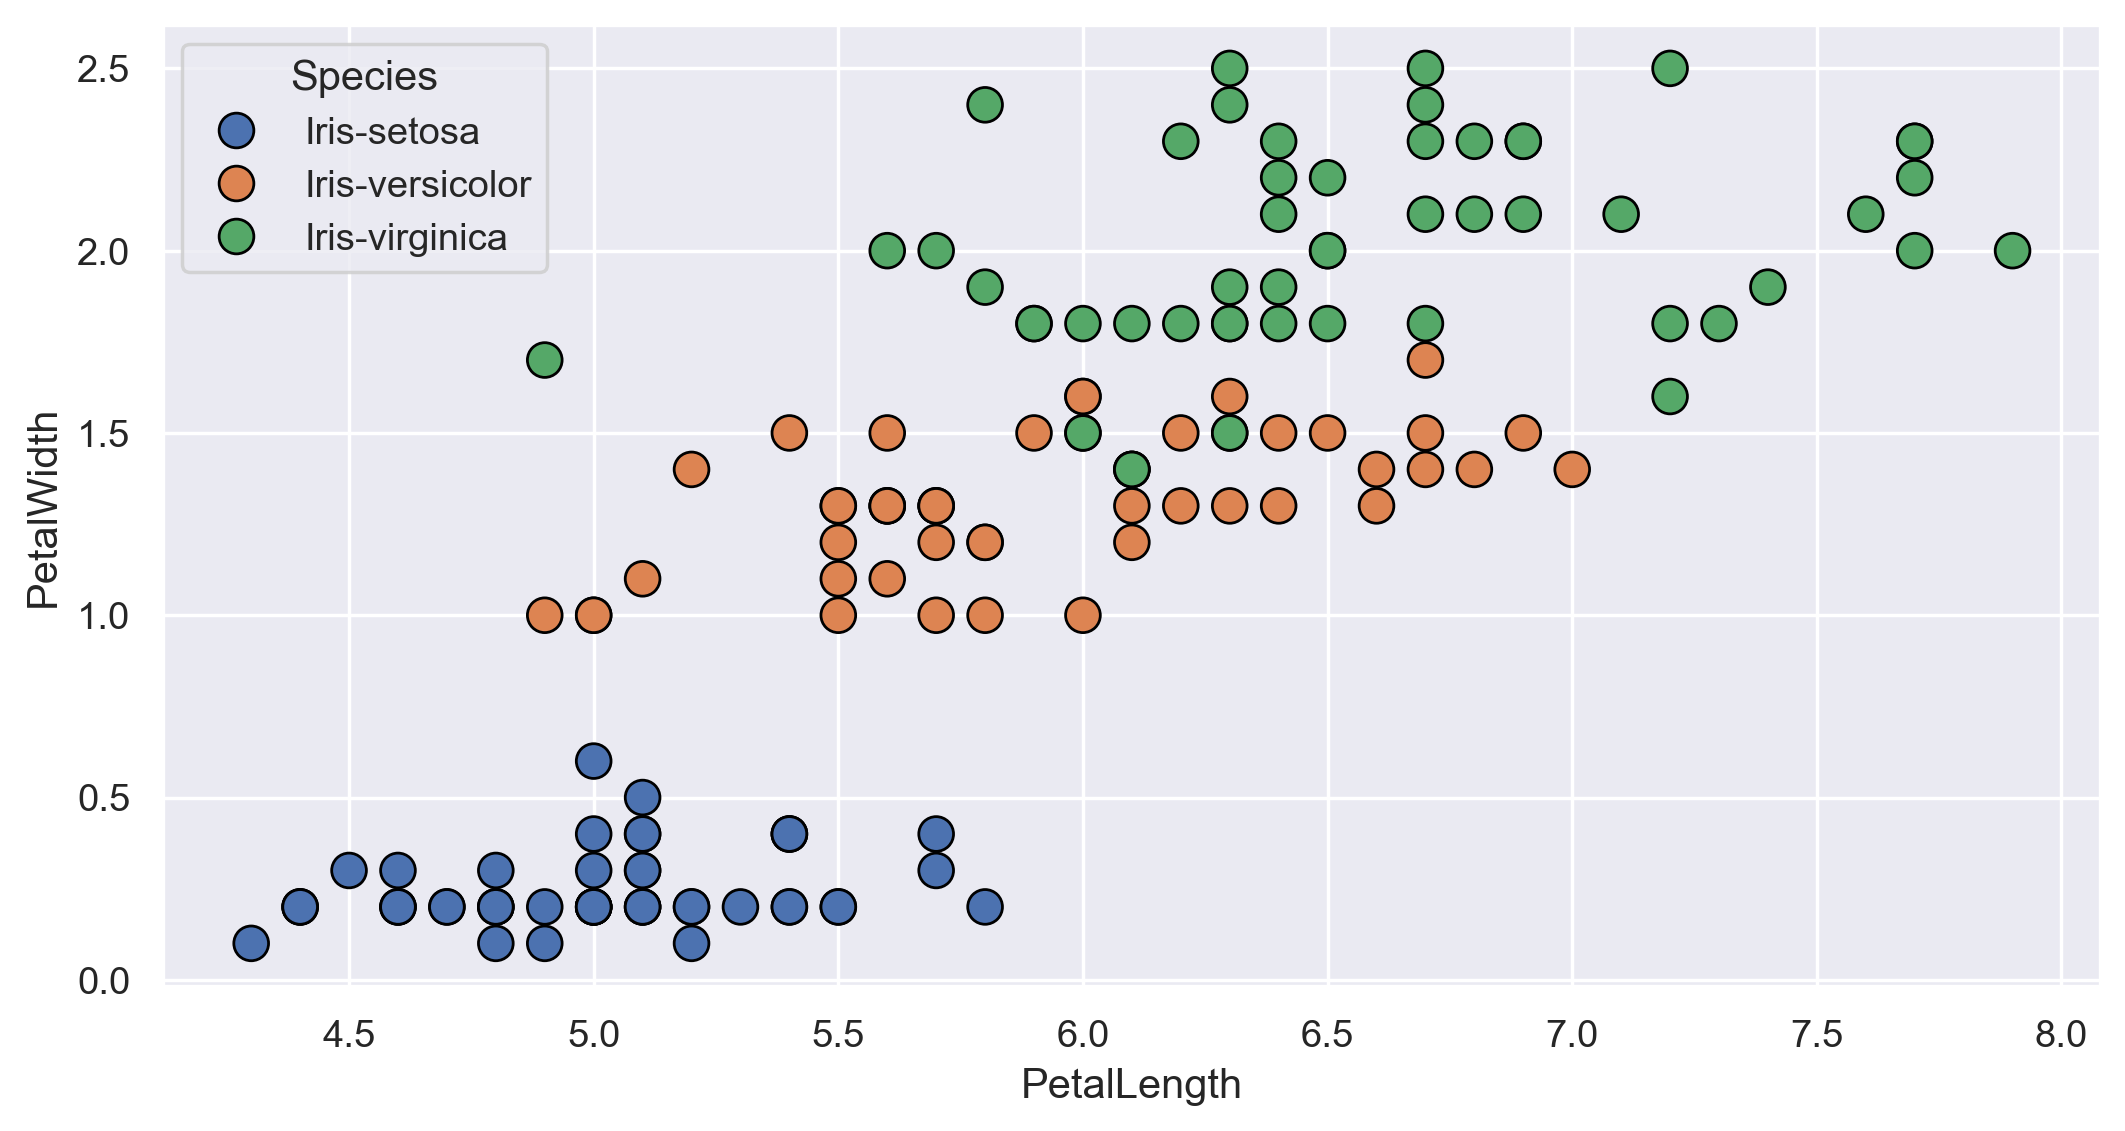

In [18]:
# scatterplot
sns.scatterplot(data=df, x='SepalLengthCm',
                y='PetalWidthCm',
                hue='Species',
                s=100,
               edgecolor='black')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

In [ ]:
# observe both graphs:

# distribution of the datapoint will always be different when dimensions are changed.
# because it is not possible to plot a any plot by using 4 dimesions without dimesionality reduction method 
# that's why I have plotted scatter plot just to see the distributio of the datapoints

In [19]:
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [24]:
# Species is a target column so seperating it to store the data in another varible
x = df.iloc[:, :4]
y = df[['Species']]

In [22]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# Feature Engineering

### standardization

In [26]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

### PCA

In [27]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[-2.29165366e+00,  4.86575865e-01, -1.30874283e-01,
        -2.19701380e-02],
       [-2.11542834e+00, -6.66014646e-01, -2.34245694e-01,
        -1.02028784e-01],
       [-2.39606952e+00, -3.32492716e-01,  4.32026887e-02,
        -2.61845349e-02],
       [-2.33243473e+00, -5.87708200e-01,  9.05862791e-02,
         6.84380449e-02],
       [-2.41539508e+00,  6.53930048e-01,  1.17936303e-02,
         3.88135662e-02],
       [-2.09491917e+00,  1.49276267e+00,  2.17976612e-02,
        -3.60414630e-03],
       [-2.47231065e+00,  5.72147539e-02,  3.33440709e-01,
         4.00868366e-02],
       [-2.26117724e+00,  2.30173947e-01, -9.13781366e-02,
         2.69292820e-02],
       [-2.37095698e+00, -1.10407134e+00,  1.45916240e-01,
         2.90674056e-02],
       [-2.21767136e+00, -4.61052527e-01, -2.54981702e-01,
         4.15373128e-02],
       [-2.18991974e+00,  1.04805609e+00, -2.73342552e-01,
        -1.45794808e-02],
       [-2.35444222e+00,  1.41126210e-01,  9.07859233e-02,
      

In [28]:
# observing information collected by PCs
pca.explained_variance_ratio_

array([0.72738591, 0.23030014, 0.03702645, 0.0052875 ])

In [ ]:
# pc1,  pc2,  pc3,  pc4 has collected 72.738591, 23.030014, 3.702645, 0.52875 percentage of information subsequently.

In [29]:
# cumulative sum of PCs information
np.cumsum(pca.explained_variance_ratio_)

array([0.72738591, 0.95768605, 0.9947125 , 1.        ])

#### pc1=0.72738591,
#### pc1+pc2=0.95768605,
#### pc1+pc2+pc3=0.9947125,
#### pc1+pc2+pc3+pc4= 1.0

# SCREE PLOT

Text(0.5, 1.0, 'SCREE PLOT')

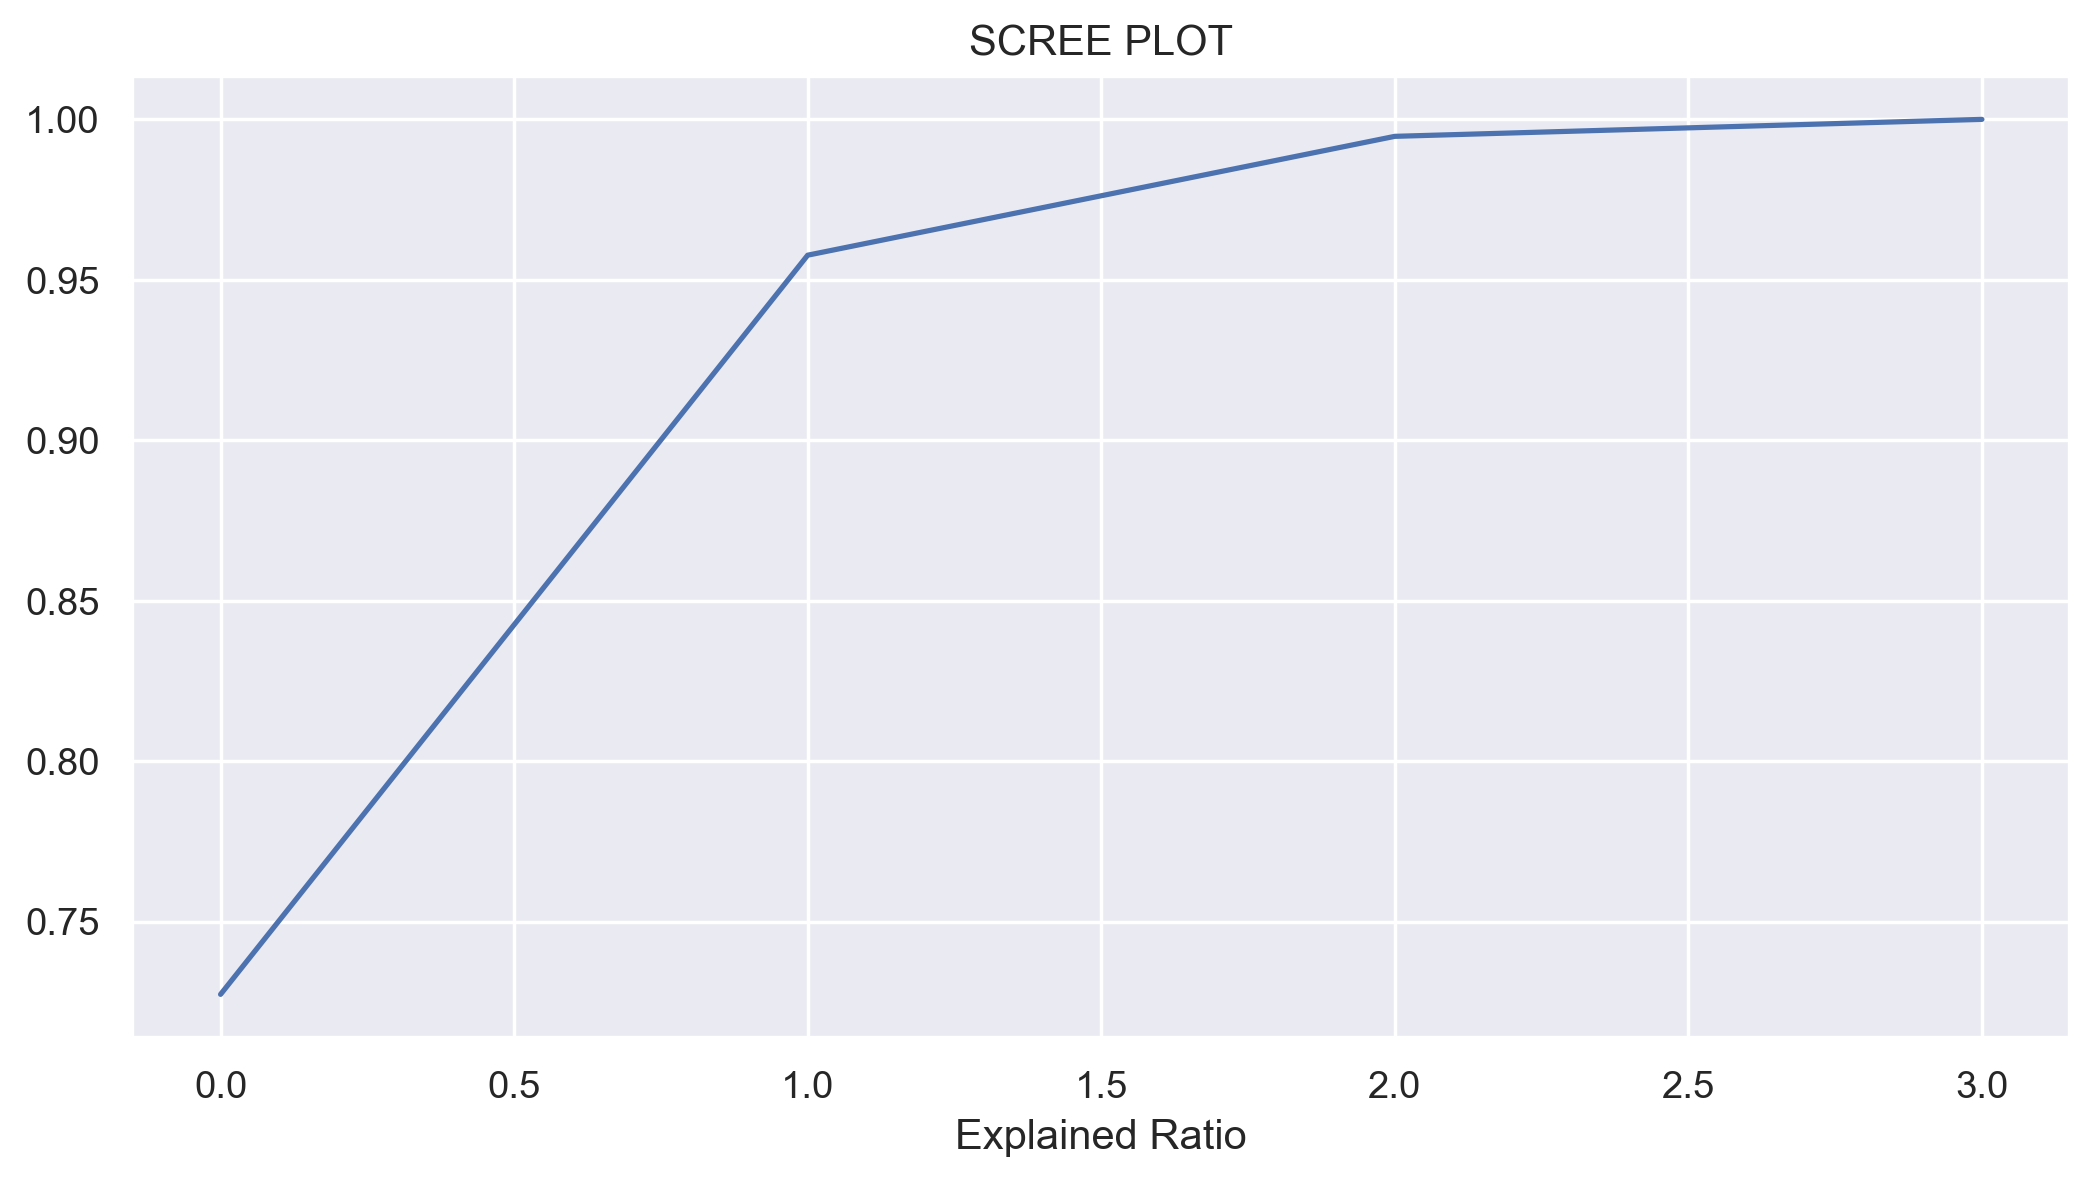

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.xlabel('Explained Ratio')
plt.title('SCREE PLOT')

In [31]:
# I want to reduce 2 dimensions and 95% information is sufficient for this model building so generating only 2 PCs
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[-2.29165366,  0.48657587],
       [-2.11542834, -0.66601465],
       [-2.39606952, -0.33249272],
       [-2.33243473, -0.5877082 ],
       [-2.41539508,  0.65393005],
       [-2.09491917,  1.49276267],
       [-2.47231065,  0.05721475],
       [-2.26117724,  0.23017395],
       [-2.37095698, -1.10407134],
       [-2.21767136, -0.46105253],
       [-2.18991974,  1.04805609],
       [-2.35444222,  0.14112621],
       [-2.25351167, -0.71982732],
       [-2.66904514, -0.94897205],
       [-2.21813735,  1.86237893],
       [-2.27424956,  2.68809739],
       [-2.22755264,  1.48801693],
       [-2.21678201,  0.49527145],
       [-1.91962607,  1.40694707],
       [-2.36521285,  1.13387169],
       [-1.9420138 ,  0.41301516],
       [-2.22981146,  0.930096  ],
       [-2.80087524,  0.46871597],
       [-1.84650413,  0.09127939],
       [-2.25496712,  0.14468551],
       [-1.98589993, -0.61852469],
       [-2.07827556,  0.24875155],
       [-2.19528362,  0.53287939],
       [-2.16791225,

In [33]:
# converting to dataframe datastructure

data = pd.DataFrame(pcs, columns=['PC1', 'PC2'])
data

,PC1,PC2
0,-2.291654,0.486576
1,-2.115428,-0.666015
2,-2.396070,-0.332493
3,-2.332435,-0.587708
4,-2.415395,0.653930
...,...,...
142,1.854704,0.373785
143,1.538703,-0.906195
144,1.503666,0.257464
145,1.362844,1.000457


In [34]:
# storing target column values in this data dataframe by creating a new column 'class'
data['class'] = y

In [36]:
data

,PC1,PC2,class
0,-2.291654,0.486576,Iris-setosa
1,-2.115428,-0.666015,Iris-setosa
2,-2.396070,-0.332493,Iris-setosa
3,-2.332435,-0.587708,Iris-setosa
4,-2.415395,0.653930,Iris-setosa
...,...,...,...
142,1.854704,0.373785,NaN
143,1.538703,-0.906195,Iris-virginica
144,1.503666,0.257464,Iris-virginica
145,1.362844,1.000457,Iris-virginica


Text(0, 0.5, 'PC2')

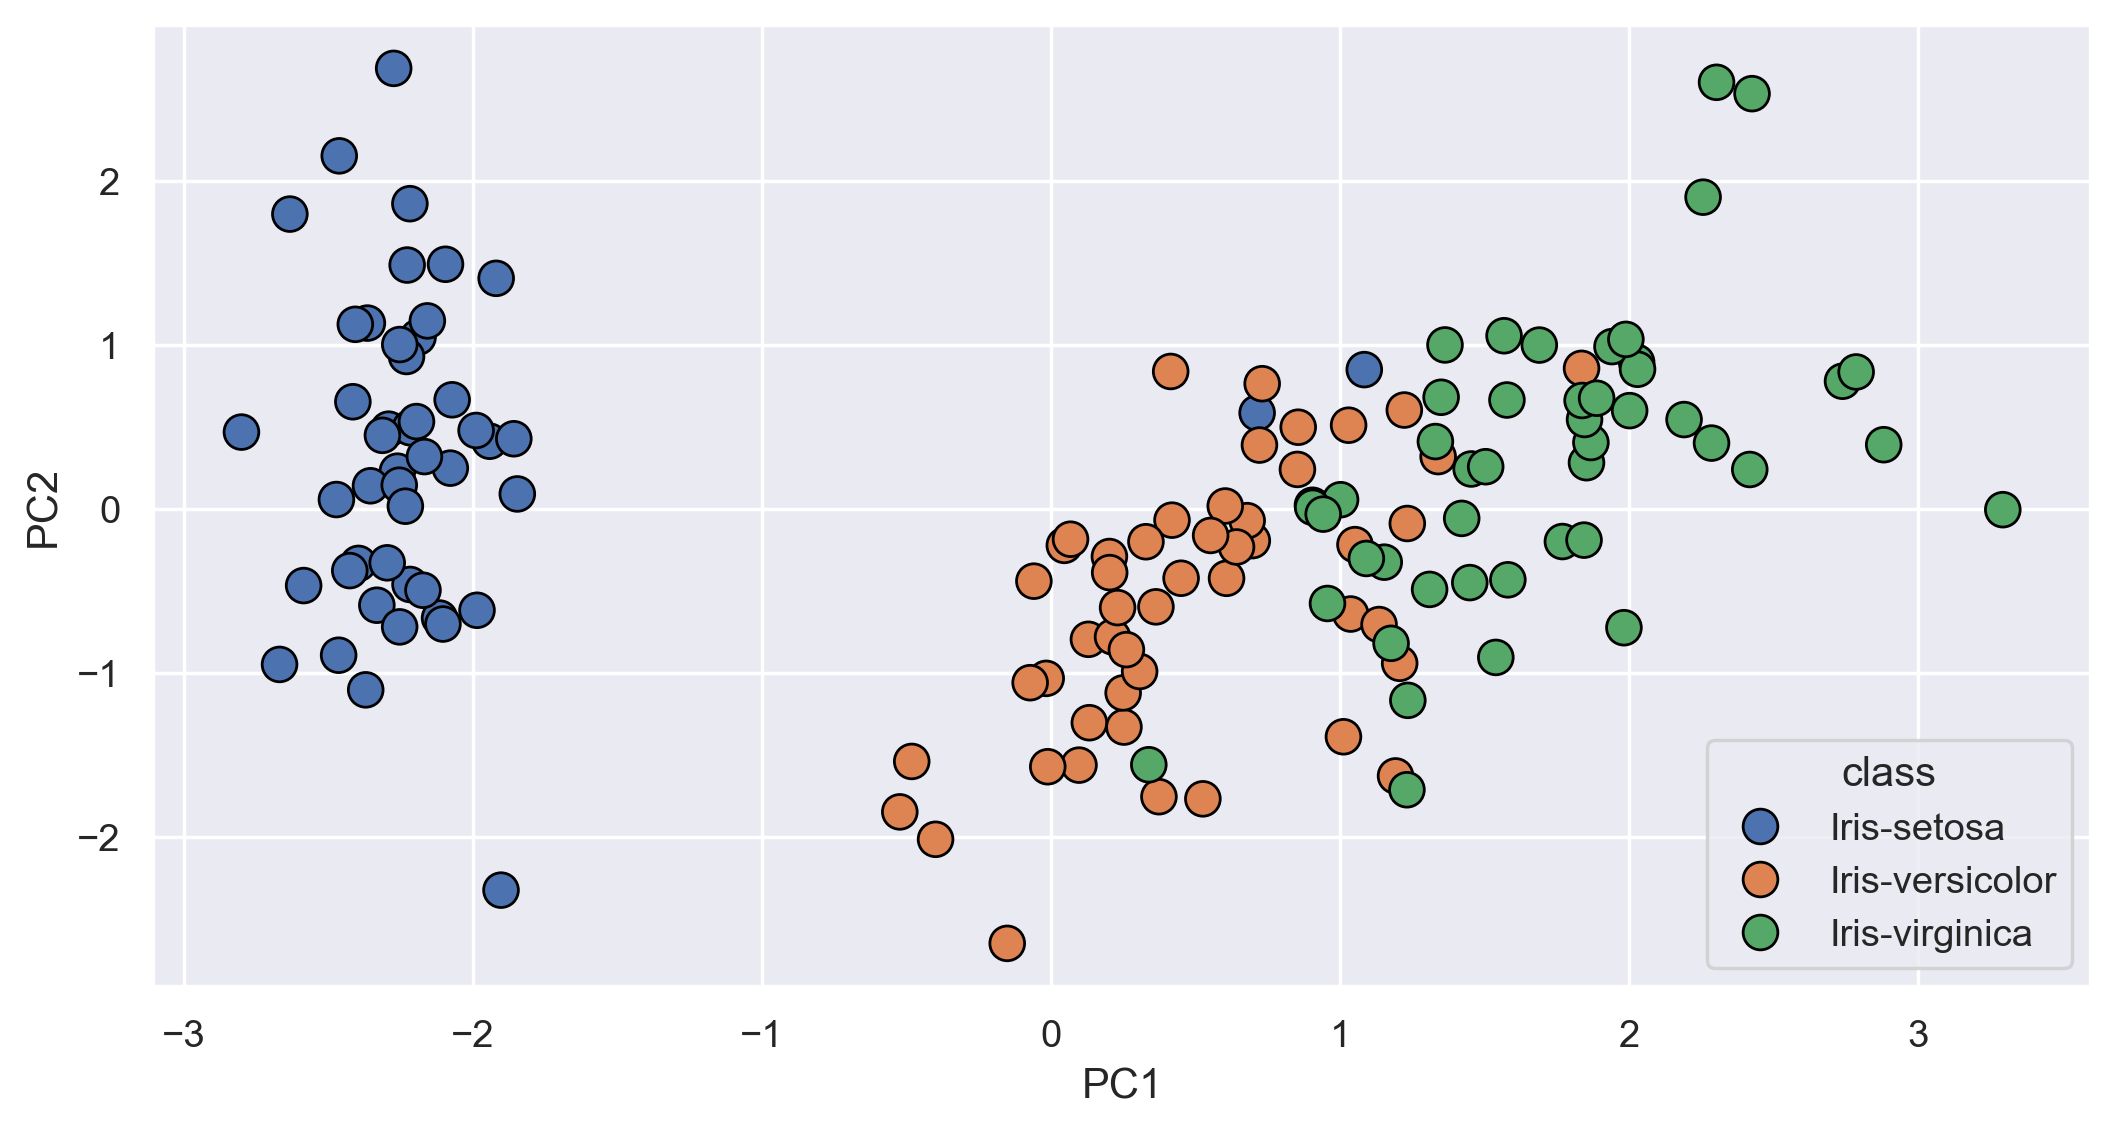

In [37]:
sns.scatterplot(data=data, x='PC1',
                y='PC2',
                hue='class',
                s=100,
               edgecolor='black')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
# the data is present in 4 dimensions but I can visualize it after performing PCA

# MODEL BUILDING

In [38]:
data.head(2)

,PC1,PC2,class
0,-2.291654,0.486576,Iris-setosa
1,-2.115428,-0.666015,Iris-setosa


In [39]:
# defining variables

x = data.iloc[:, :2]
y = data['class']

,PC1,PC2
0,-2.291654,0.486576
1,-2.115428,-0.666015
2,-2.396070,-0.332493
3,-2.332435,-0.587708
4,-2.415395,0.653930
...,...,...
142,1.854704,0.373785
143,1.538703,-0.906195
144,1.503666,0.257464
145,1.362844,1.000457


In [42]:
# splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.20, random_state=42)

In [43]:
xtrain

,PC1,PC2
41,-1.989062,0.478614
58,-0.151620,-2.651130
90,0.306430,-0.992043
48,1.083643,0.849886
88,0.249428,-1.122648
107,2.255753,1.902267
21,-2.229811,0.930096
57,-0.016785,-1.034069
75,1.339158,0.319238
32,-2.633334,1.799011


In [44]:
xtest

,PC1,PC2
125,1.001601,0.056045
51,0.373256,-1.756112
138,2.001680,0.599697
19,-2.365213,1.133872
104,0.338205,-1.561158
...,...,...
61,0.696327,-0.193582
144,1.503666,0.257464
79,-0.011364,-1.573287
59,0.418454,-0.068581


In [45]:
ytrain

,Species
43,Iris-setosa
60,Iris-versicolor
92,Iris-versicolor
50,Iris-versicolor
90,Iris-versicolor
109,Iris-virginica
21,Iris-setosa
59,Iris-versicolor
77,Iris-versicolor
32,Iris-setosa


In [46]:
ytest

,Species
127,Iris-virginica
53,Iris-versicolor
140,Iris-virginica
19,Iris-setosa
106,Iris-virginica
...,...
63,Iris-versicolor
147,Iris-virginica
81,Iris-versicolor
61,Iris-versicolor


In [47]:
# model building
lg = LogisticRegression()
lg.fit(xtrain, ytrain)
ypred = lg.predict(xtest)
ypred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris

# MODLE EVALUATION

In [48]:
print(classification_report(ytest, ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.98      0.99        41
Iris-versicolor       0.79      0.97      0.87        39
 Iris-virginica       0.97      0.76      0.85        38

       accuracy                           0.91       118
      macro avg       0.92      0.90      0.90       118
   weighted avg       0.92      0.91      0.91       118



In [ ]:
# overall accuracy is 91 % of the model